In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import src.constants as const
import preamble

In [14]:
# import data
df = pd.read_parquet("data/speech_embeddings.parquet")

In [15]:
MODEL_NAME = "google/embeddinggemma-300m" # previously chosen embedding model
OUTDATED_MODELS = ["jinaai/jina-embeddings-v3",
            "jinaai/jina-embeddings-v4",
            "Snowflake/snowflake-arctic-embed-l-v2.0",
            "BAAI/bge-m3", 
            'sentence-transformers/all-MiniLM-L6-v2', 
            'sentence-transformers/all-mpnet-base-v2',
            'Qwen/Qwen3-Embedding-0.6B']

In [16]:
# delete all columns of outdated models to save memory
for outdated_model in OUTDATED_MODELS:
    if outdated_model in df.columns:
        del df[outdated_model]

In [6]:
df.head()

,Unnamed: 0,speaker,text,date,agenda,speechnumber,procedure_ID,partyfacts_ID,period,chair,...,written,multispeaker,link,translatedText,translationSource,year,block,party,migration_prob,google/embeddinggemma-300m
492,492,Karen Melchior,"Mr President, thank you very much to the Commi...",2024-04-24,22. Advance passenger information: enhancing a...,8,bill_26075_ID bill_26076_ID bill_26075_ID bi...,6401.0,9,False,...,False,False,https://www.europarl.europa.eu/doceo/document/...,"Mr President, thank you very much to the Commi...",original_gm,2024,liberal,ELDR/ALDE/Renew,0.393282,"[-0.06368264, -0.01790871, 0.008169121, 0.0173..."
844,844,Tineke Strik,"Mr President, Commissioner. People who flee wa...",2024-04-23,17. EU-Egypt strategic and comprehensive partn...,9,,6403.0,9,False,...,False,False,https://www.europarl.europa.eu/doceo/document/...,"Mr President, Commissioner. People who flee wa...",original_gm,2024,green,Greens/EFA,0.423501,"[-0.06358229, 0.05332363, -0.006831329, 0.0041..."
1050,1050,Anabela Rodrigues,"Senhora Presidente, em 2024, o tráfico de sere...",2024-04-22,20. Amending Directive 2011/36/EU on preventin...,10,bill_241_ID bill_241_ID,6402.0,9,False,...,False,False,https://www.europarl.europa.eu/doceo/document/...,"Madam President, in 2024, human trafficking co...",machine_gm,2024,left,NGL/The Left,0.375925,"[-0.049918693, -0.001202861, -0.008896867, -0...."
1054,1054,Beata Kempa,Pani Przewodnicząca! Pani Komisarz! Potrzebuje...,2024-04-22,20. Amending Directive 2011/36/EU on preventin...,14,bill_241_ID bill_241_ID,6400.0,9,False,...,False,False,https://www.europarl.europa.eu/doceo/document/...,"Madam Commissioner! We need very specific, ver...",machine_gm,2024,(extreme)_right,ECR,0.256493,"[-0.035047594, 0.03835739, -0.051198084, 0.050..."
1056,1056,Dorien Rookmaker,"Voorzitter, dank u wel, meneer Engerer, want u...",2024-04-22,20. Amending Directive 2011/36/EU on preventin...,16,bill_241_ID bill_241_ID,6400.0,9,False,...,False,False,https://www.europarl.europa.eu/doceo/document/...,"Madam President, thank you, Mr Engerer, becaus...",machine_gm,2024,(extreme)_right,ECR,0.475315,"[-0.06766452, 0.015919995, -0.019874139, -0.01..."


In [21]:
# employ tSNE to reduce dimensionality of embeddings to 2D for visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(np.vstack(df[MODEL_NAME].values))
df['tsne_1'] = embeddings_2d[:, 0]
df['tsne_2'] = embeddings_2d[:, 1]

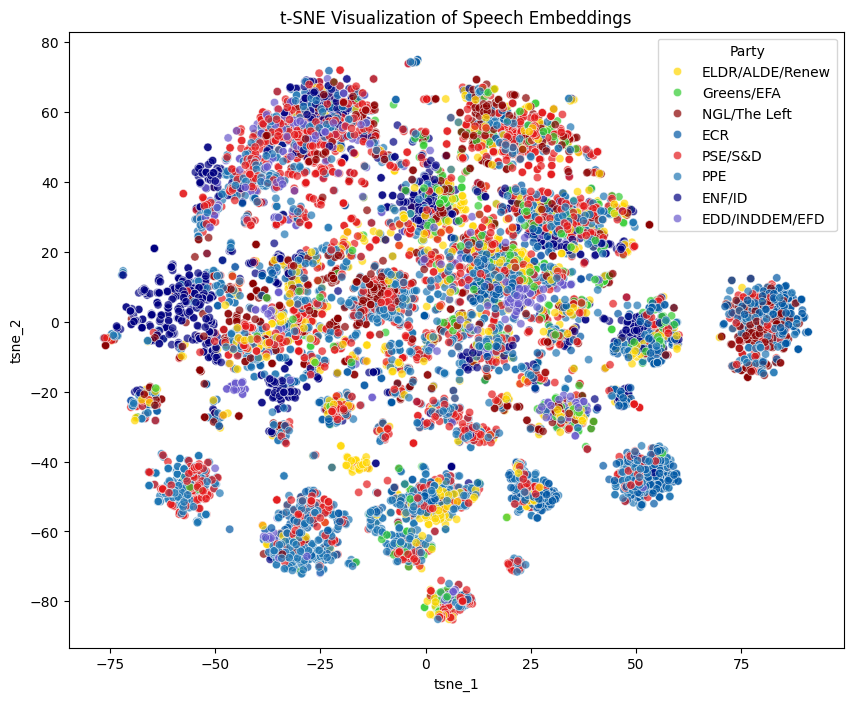

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='party', data=df, alpha=0.7, palette=const.COLOR_MAP_PARTY)
plt.title('t-SNE Visualization of Speech Embeddings')
plt.legend(title='Party')
plt.show()

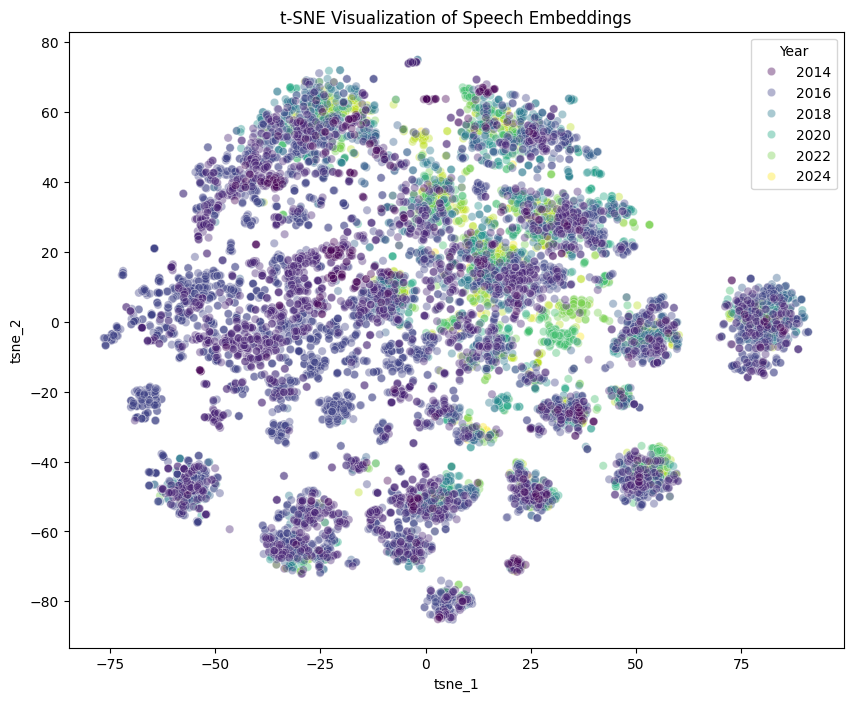

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='year', data=df, alpha=0.4, palette='viridis')
plt.title('t-SNE Visualization of Speech Embeddings')
plt.legend(title='Year')
plt.show()

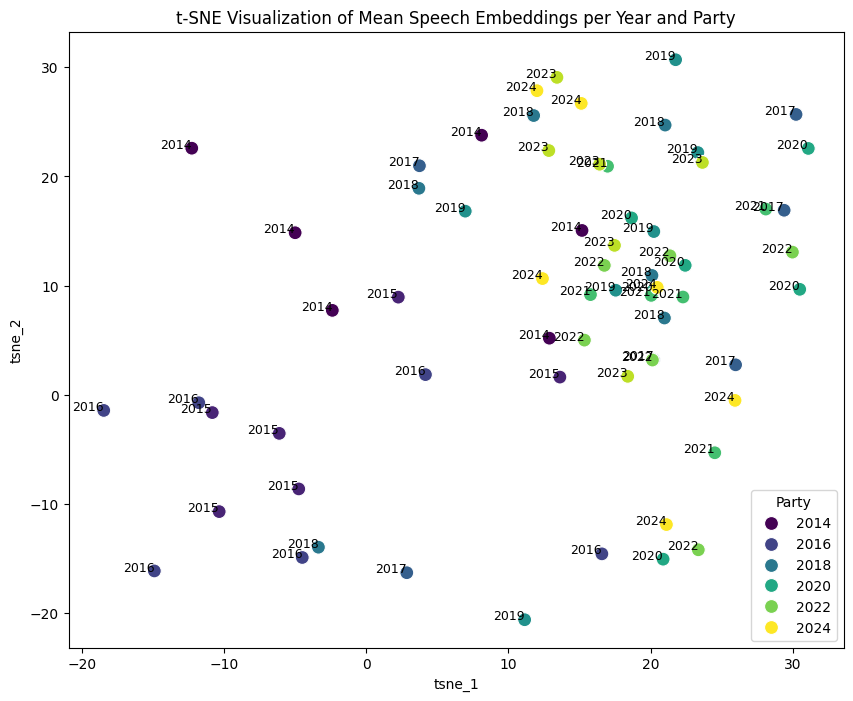

In [29]:
# means per year and party
df_means = df.groupby(['year', 'block'])[['tsne_1', 'tsne_2']].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='year', data=df_means, s=100, palette="viridis")
for _, row in df_means.iterrows():
    plt.text(row['tsne_1'], row['tsne_2'], str(int(row['year'])), fontsize=9, ha='right')
plt.title('t-SNE Visualization of Mean Speech Embeddings per Year and Party')
plt.legend(title='Party')
plt.show()